In [38]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb 
import matplotlib.pyplot as plt


In [51]:
tickers = ['PG','MSFT','F','GE']
mydata = pd.DataFrame()
for t in tickers:
    mydata[t] = wb.DataReader(t, data_source='yahoo', start='1995-1-1')['Adj Close']

In [52]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6374 entries, 1995-01-03 to 2020-04-27
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PG      6374 non-null   float64
 1   MSFT    6374 non-null   float64
 2   F       6374 non-null   float64
 3   GE      6374 non-null   float64
dtypes: float64(4)
memory usage: 249.0 KB


In [53]:
mydata.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,6.320252,2.413537,3.256691,2.729230
1995-01-04,6.269589,2.431082,3.344314,2.729230
1995-01-05,6.180927,2.390982,3.315107,2.735919
1995-01-06,6.193593,2.431082,3.315107,2.722540
1995-01-09,6.168259,2.416045,3.373522,2.695783


In [54]:
mydata.tail()

,PG,MSFT,F,GE
Date,,,,
2020-04-21,118.887138,167.820007,4.77,6.48
2020-04-22,118.609001,173.520004,4.77,6.43
2020-04-23,119.400002,171.419998,4.89,6.52
2020-04-24,118.779999,174.550003,4.87,6.26
2020-04-27,117.250000,174.789993,5.04,6.37


In [55]:
mydata.iloc[0]

PG      6.320252
MSFT    2.413537
F       3.256691
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

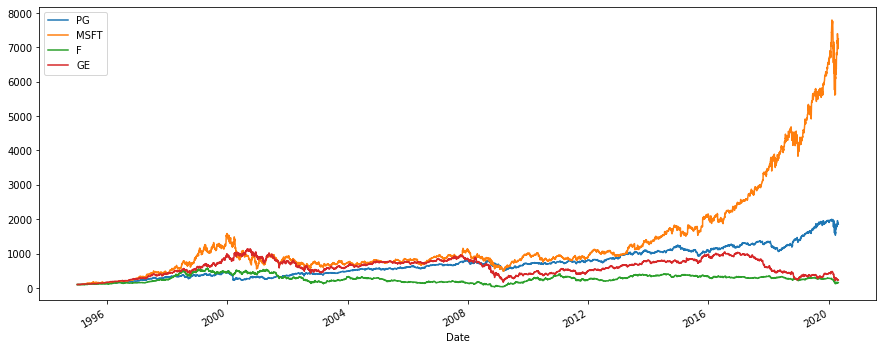

In [56]:
(mydata / mydata.iloc[0] * 100).plot(figsize = (15,6));

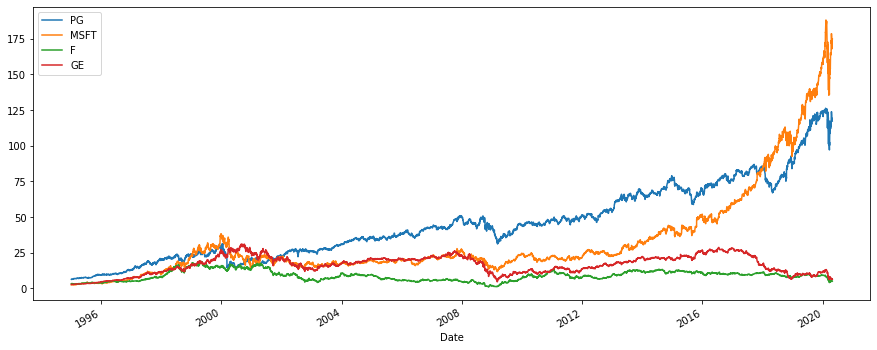

In [65]:
mydata.plot(figsize=(15,6))

In [66]:
mydata.iloc[0]

PG      6.320252
MSFT    2.413537
F       3.256691
GE      2.729230
Name: 1995-01-03 00:00:00, dtype: float64

In [70]:
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,PG,MSFT,F,GE
Date,,,,
1995-01-03,NaN,NaN,NaN,NaN
1995-01-04,-0.008016,0.007269,0.026906,0.000000
1995-01-05,-0.014142,-0.016495,-0.008733,0.002451
1995-01-06,0.002049,0.016771,0.000000,-0.004890
1995-01-09,-0.004090,-0.006185,0.017621,-0.009828


In [71]:
weights = np.array([0.25, 0.25, 0.25, 0.25])

In [72]:
np.dot(returns, weights)

array([        nan,  0.00653978, -0.0092298 , ...,  0.00843018,
       -0.00772515,  0.01024335])

In [74]:
annual_returns = returns.mean() * 250
annual_returns

PG      0.140566
MSFT    0.218153
F       0.096293
GE      0.082527
dtype: float64

In [75]:
np.dot(annual_returns , weights)

0.13438479062800185

In [76]:
pfolio_1 = str(round(np.dot(annual_returns, weights),5) * 100) + '%'
pfolio_1

'13.438%'

In [77]:
weights_2 = np.array([0.4, 0.4, 0.15, 0.05])

In [79]:
pfolio_2 = str(round(np.dot(annual_returns, weights),5) * 100) + '%'
print(pfolio_1)
print(pfolio_2)

13.438%
13.438%
